In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [8]:
local_results_dir = "/home/benp/Documents/PhD_projects/WMH_UQ_assessment/trustworthai/journal_run/evaluation/results/initial_hparam_tuning/out_domain_results"

In [9]:
files = os.listdir(local_results_dir)

In [11]:
model_names = [f.split("_individual_stats.csv")[0] for f in files if "_individual_stats.csv" in f]

In [13]:
model_names

['landonia_stepdecay100_lr0.01_es100',
 'early_stop15_lr2e-4',
 'standard_model_duplicate',
 'damnii_wd1e-1',
 'eslice_retention0.9',
 'eslice_retention0.3',
 'dice_factor1.5',
 'landonia_stepdecay25_lr0.01_es100',
 'early_stop60_lr2e-4_stepdecay30',
 'polydecay_lr0.01',
 'dice_factor0.5',
 'wd0',
 'wd1e-5',
 'early_stop60_lr2e-4',
 'landonia_early_stop30_lr2e-4',
 'standard_model',
 'damnii_wd1e-3',
 'landonia_early_stop60_lr2e-4',
 'eslice_retention0.05',
 'dice_factor0.25',
 'check_cluster_working',
 'dice_factor1.75',
 'damnii_wd1e-4',
 'landonia_stepdecay50_lr0.01_es100',
 'dice_factor1.25',
 'landonia_early_stop60_lr2e-4_stepdecay30',
 'eslice_retention1',
 'dice_factor0.75',
 'polydecay_lr0.01_secondrun',
 'early_stop30_lr2e-4',
 'damnii_wd1e-2']

In [14]:
lr_tune = ['landonia_stepdecay100_lr0.01_es100',
 'early_stop15_lr2e-4',
 'standard_model_duplicate',
 'landonia_stepdecay25_lr0.01_es100',
 'early_stop60_lr2e-4_stepdecay30',
 'polydecay_lr0.01',
 'early_stop60_lr2e-4',
 'landonia_early_stop30_lr2e-4',
 'standard_model',
 'landonia_early_stop60_lr2e-4',
 'check_cluster_working',
 'landonia_stepdecay50_lr0.01_es100',
 'landonia_early_stop60_lr2e-4_stepdecay30',
 'polydecay_lr0.01_secondrun',
 'early_stop30_lr2e-4',
]

In [17]:
eslice_retention_tune = [
 'eslice_retention1',
 'eslice_retention0.9',
 'eslice_retention0.3',
 'eslice_retention0.05',
]

In [19]:
wd_tune = [
 'wd0',
 'wd1e-5',
 'damnii_wd1e-3',
 'damnii_wd1e-4',
 'damnii_wd1e-2',
 'damnii_wd1e-1',
]

In [20]:
dice_factor_tune = [
 'dice_factor0.25',
 'dice_factor0.5',
 'dice_factor0.75',
 'standard_model',
 'dice_factor1.5',
 'dice_factor1.25',
 'dice_factor1.75',
]

In [52]:
#load the files
def load_dfs(folder, model_names):
    dfs_individual = []
    dfs_overall = []
    
    combine_dfs = lambda dfs: pd.concat(dfs).drop(columns=["Unnamed: 0"]).reset_index(drop=True)
    
    for model_name in model_names:
        model_file = os.path.join(folder, model_name)
        dfs_individual.append(pd.read_csv(model_file + "_individual_stats.csv"))
        dfs_overall.append(pd.read_csv(model_file + "_overall_stats.csv"))
    
    return combine_dfs(dfs_individual), combine_dfs(dfs_overall)




In [69]:
def plot_box_colums(df):
    df = ind_dfs

    fig, axs = plt.subplots(1, 5, figsize=(20, 5))

    for i, col in enumerate(df.columns[:-1]):
        ax = axs[i] 
        bp = sns.boxplot(x="model_name", y=col, data=df, ax=ax)
        ax.set_title(col)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    # plt.setp(axs, xticklabels=df["model_name"].unique())
    # plt.tick_params(axis='x', which='major', labelsize=15, labelrotation=90)
    plt.show()

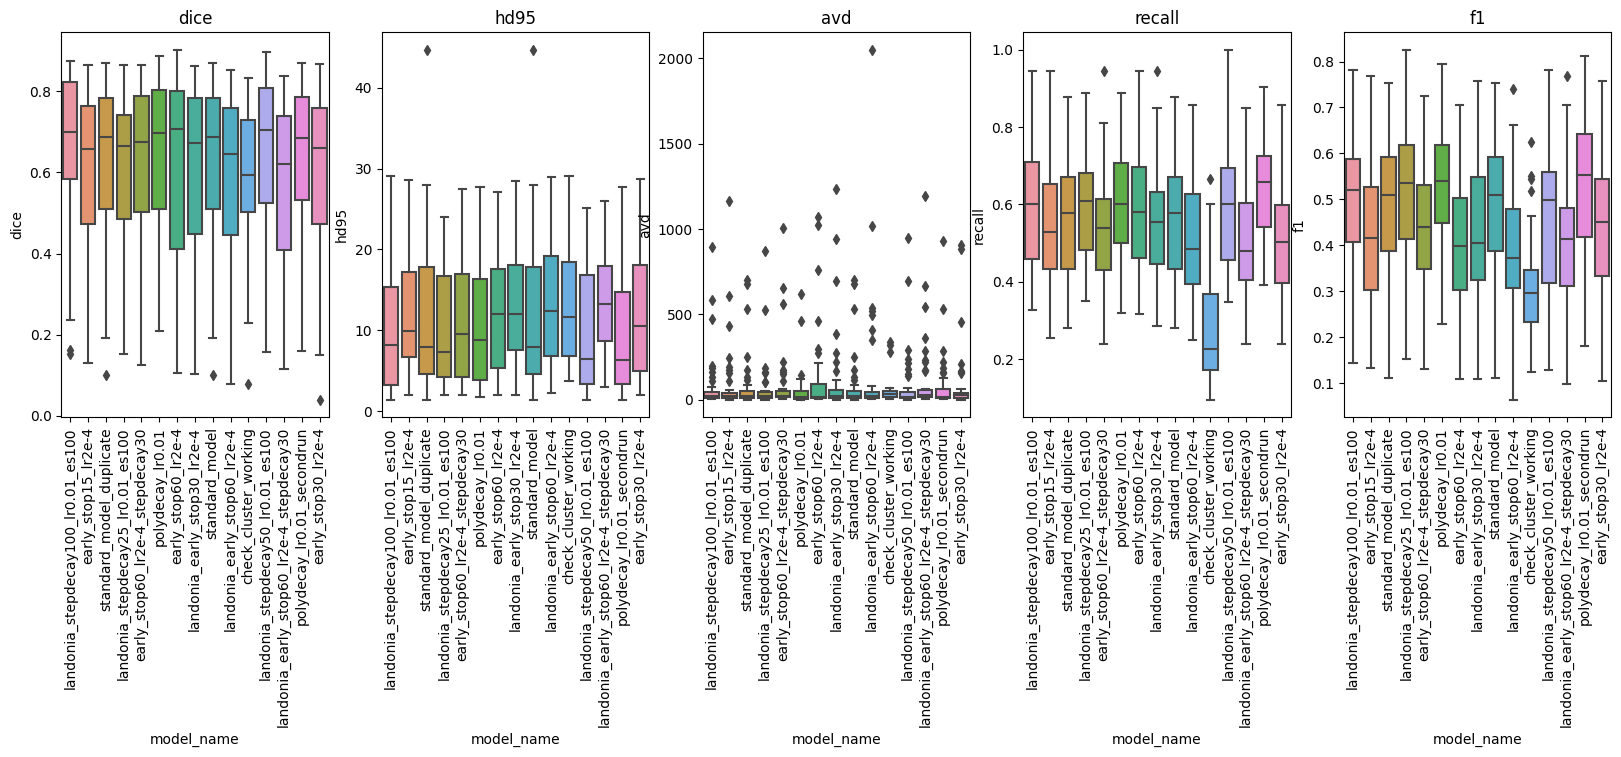

In [70]:
ind_dfs, overall_dfs = load_dfs(local_results_dir, lr_tune)
plot_box_colums(ind_dfs)

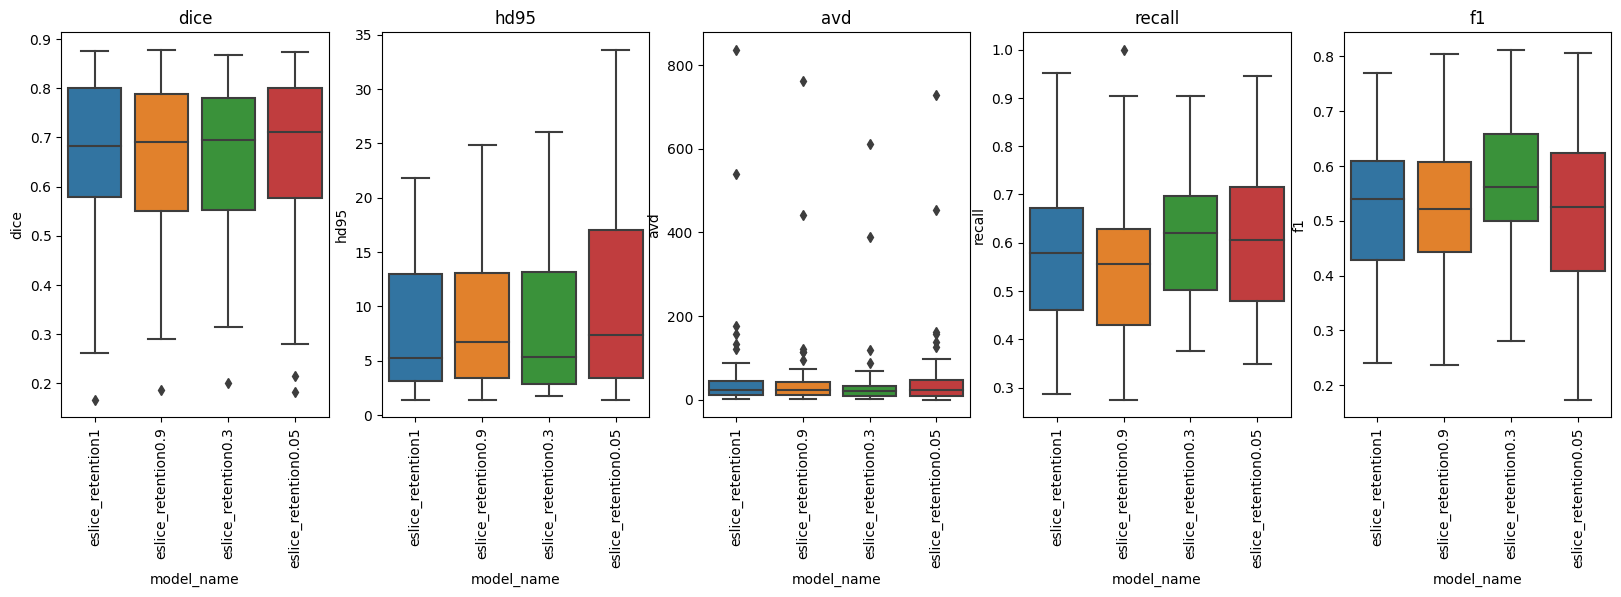

In [71]:
ind_dfs, overall_dfs = load_dfs(local_results_dir, eslice_retention_tune)
plot_box_colums(ind_dfs)

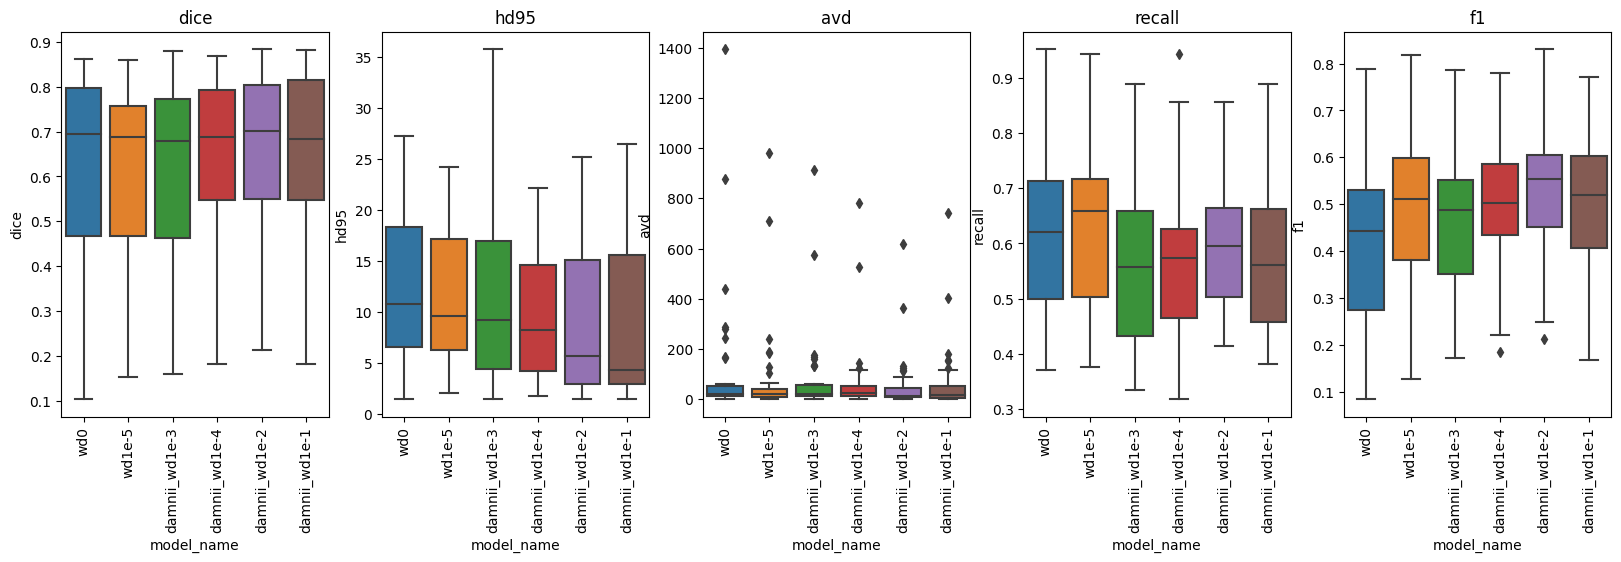

In [72]:
ind_dfs, overall_dfs = load_dfs(local_results_dir, wd_tune)
plot_box_colums(ind_dfs)

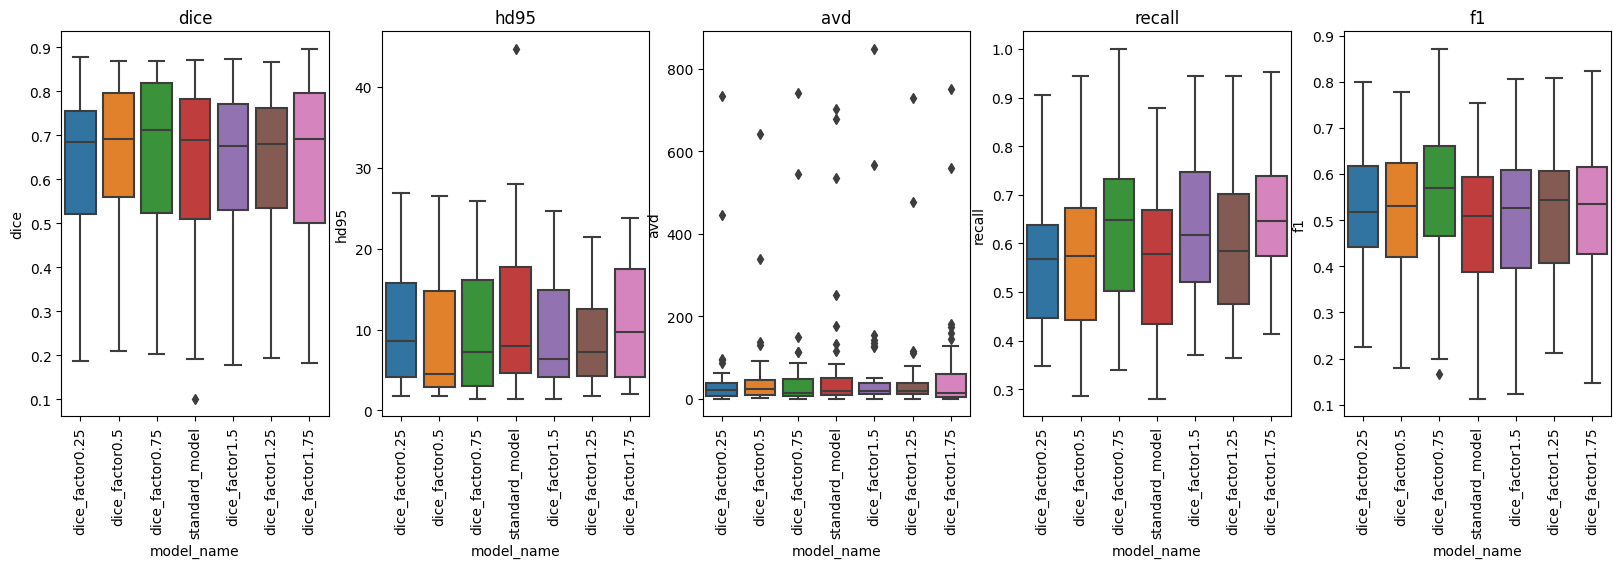

In [73]:
ind_dfs, overall_dfs = load_dfs(local_results_dir, dice_factor_tune)
plot_box_colums(ind_dfs)